

```
`# PREPROCESSING_DATA_STEPS`
1) IMPORTING REQUIERD LIBRARIES
2) IMPORTING DATA
3) SANITY CHECK
   3.1) VERIFYING SHAPE
   3.2) CHECKCING MISSING DATA
   3.3) VERIFYING FOR DUPLICATES AND GARBAGE DATA
4) HANDLING THE MISSIG DATA and EDA ( vice versa)
6) NORMALISATION AND ENCODING FOR MODEL


```




# import requried libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing data


In [7]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


observation: #columns called features ; rows called instances

In [8]:
data.shape

(2938, 22)

Observation: (2938, 22) : 2938 instances and 22 features

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Observation :


* out of 22 features : 16 float 4 interger and 2 objective type data.   
* having some non-null values.




In [14]:
# checking duplicate values and null values
nullcount = data.isnull().sum()
duplicatecount = data.duplicated().sum()
print(nullcount ,'\n')
print(duplicatecount)


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64 

0


observations: no duplicate values, but there is considerable amount of null values

In [23]:
#verifying for garbage values - ideally garbage is objective datatype
for i in data.select_dtypes(include = 'object').columns:
  print(data[i].value_counts())   #will give the count of unique values



Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64


Observation: I could see only unique values , there is no particular garbage values in any features

In [25]:
#EDA
# check how the data spread
data.describe(include = 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


observation: A stastical representation of mean , median, mode and percentage of data spread. and 193 unique values

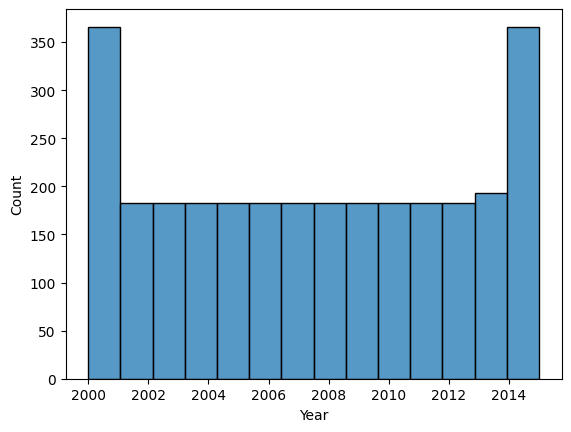

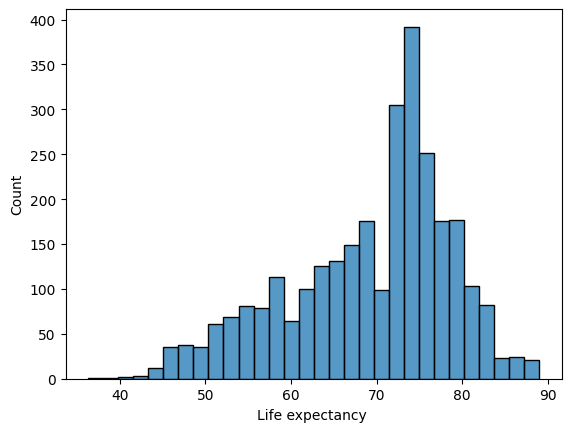

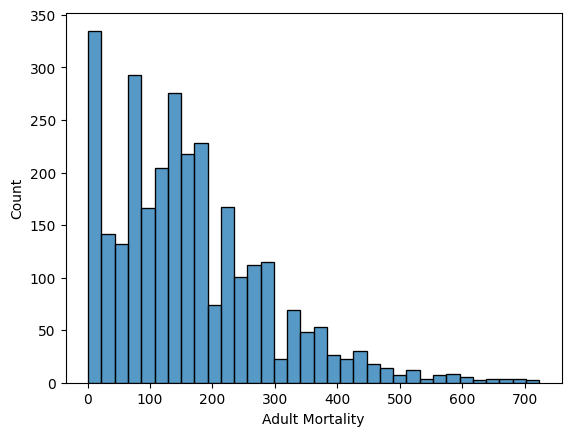

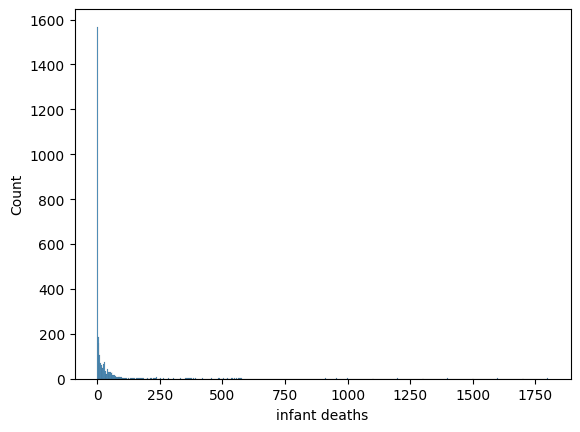

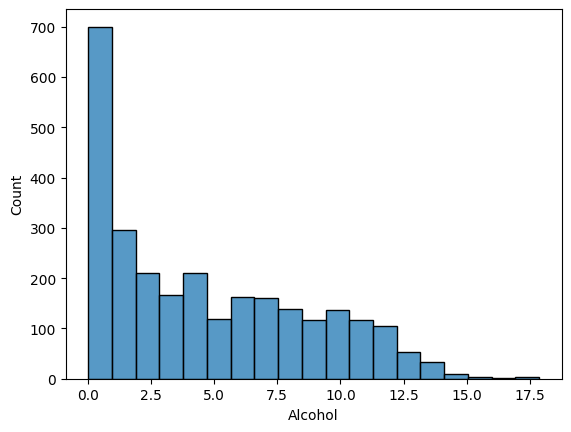

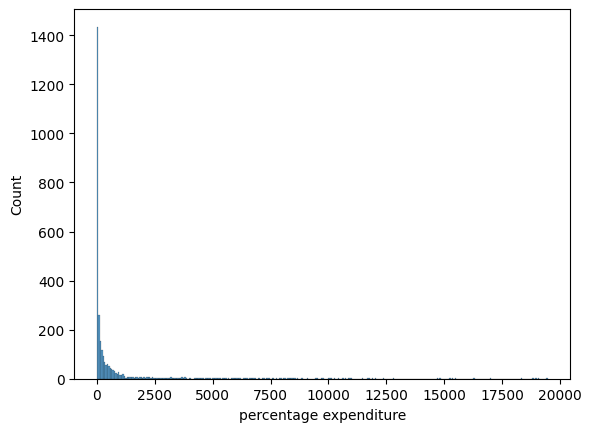

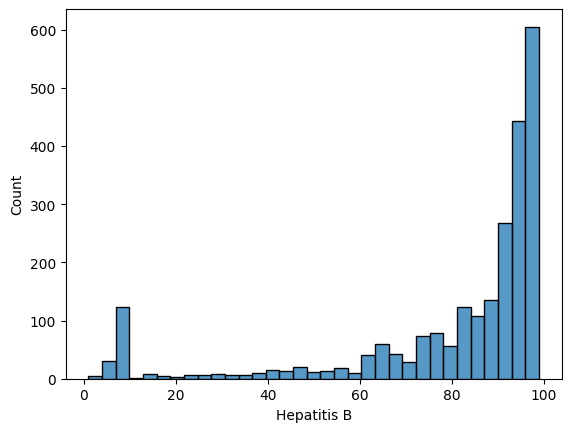

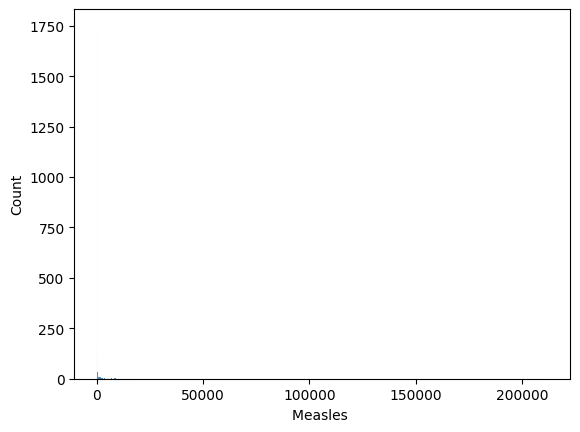

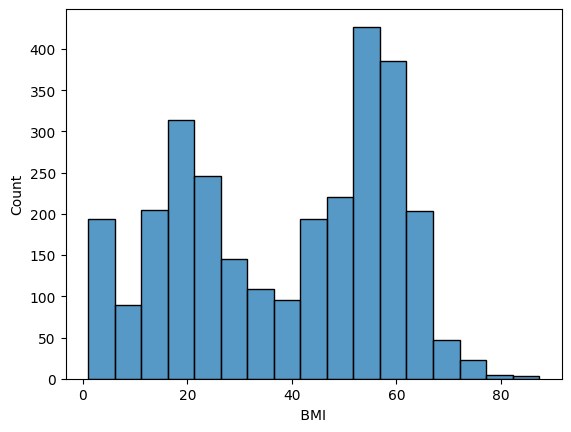

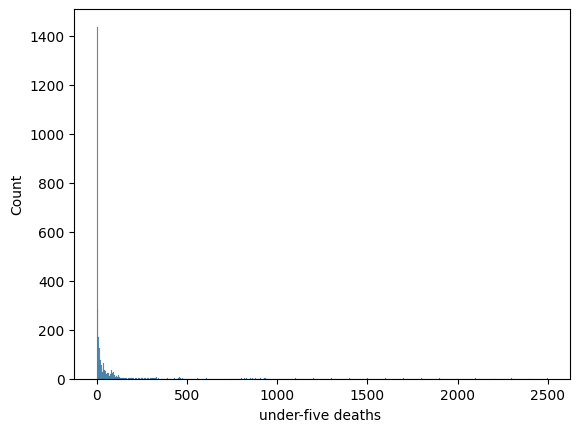

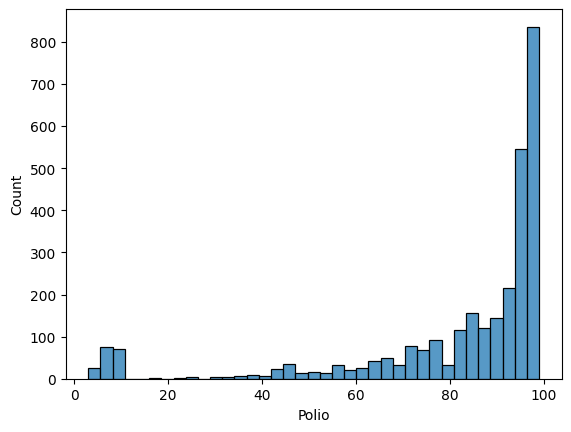

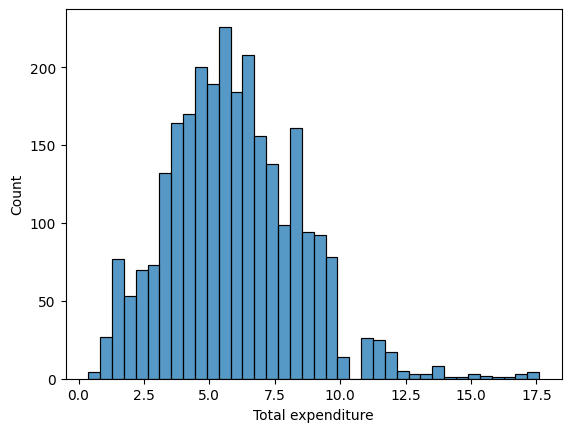

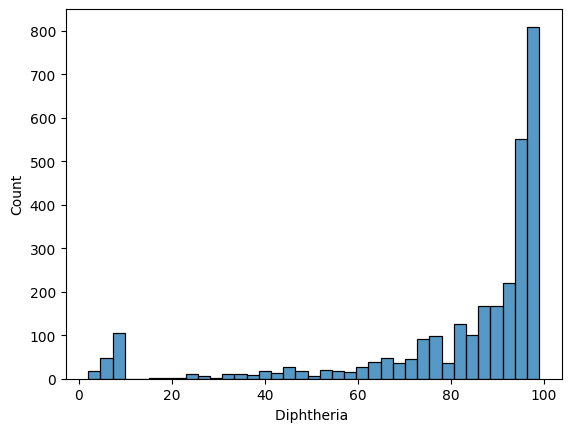

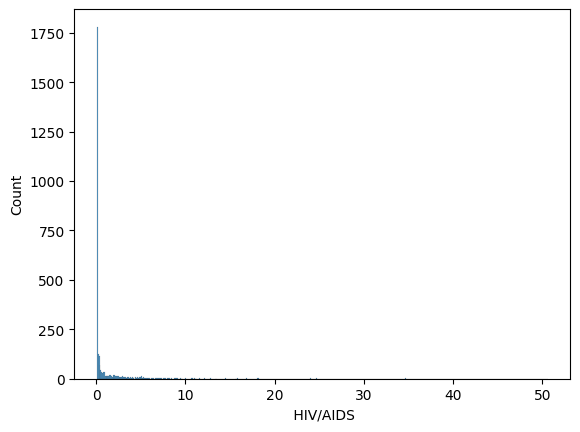

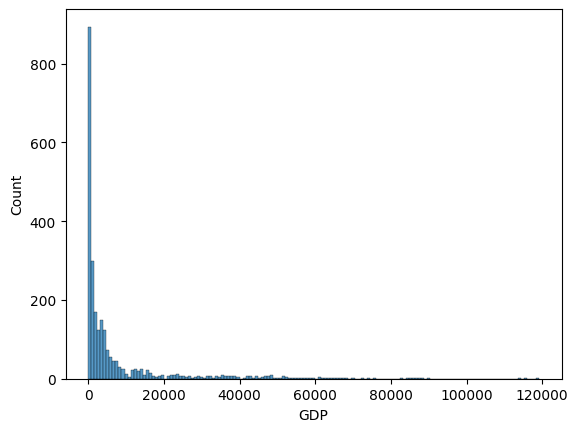

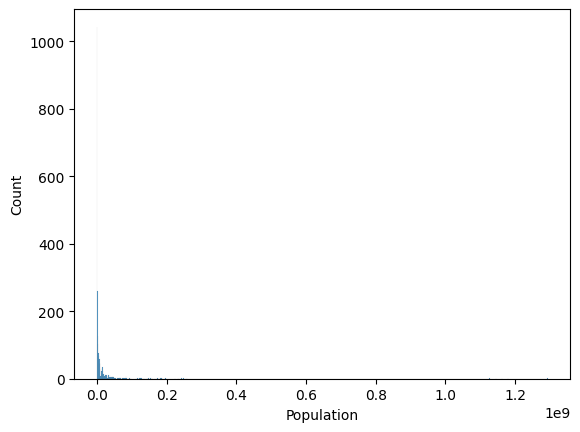

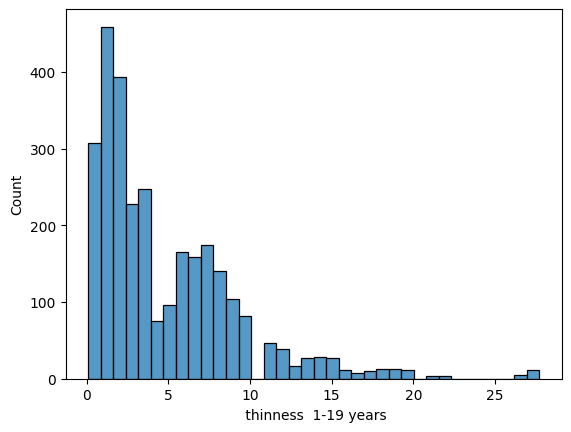

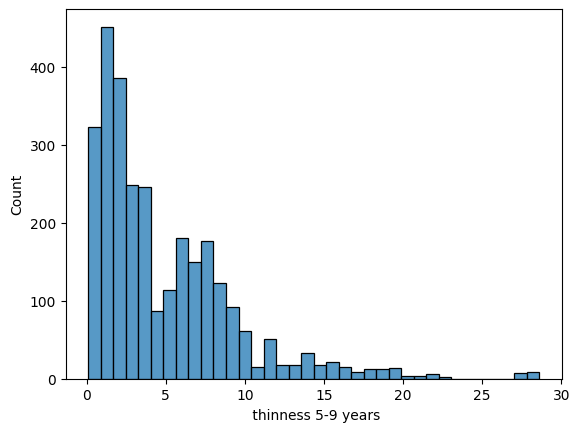

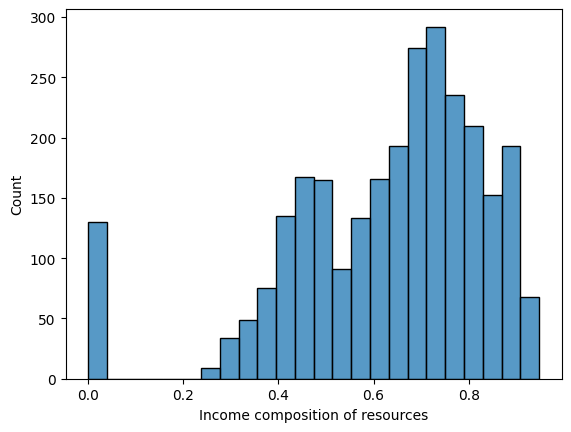

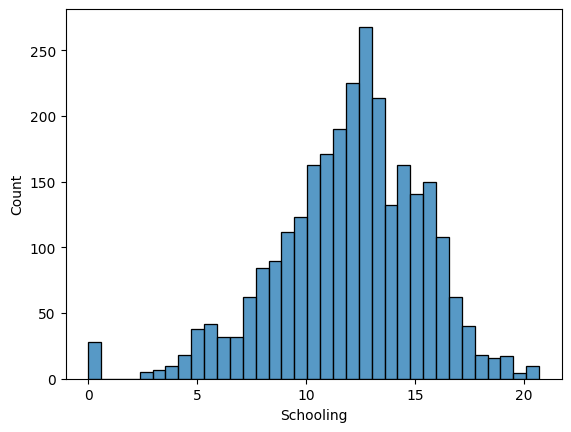

In [28]:
# checcking with Histogram - to understand the data more effectively and visually

for i in data.select_dtypes(include = 'number').columns:
  sns.histplot(data = data, x = i)
  plt.show()

observation : in the above I have taken only numerical coz catogorical can't be handled


1. year : except 2014 and 2000 rest is uniformly distributed.
2. life expectancy =  normal distribution pretty cool
3. adult mortality : stochastic distribution
4. infant death  : poison distribution seems more lamda = 0.5
5. etc  


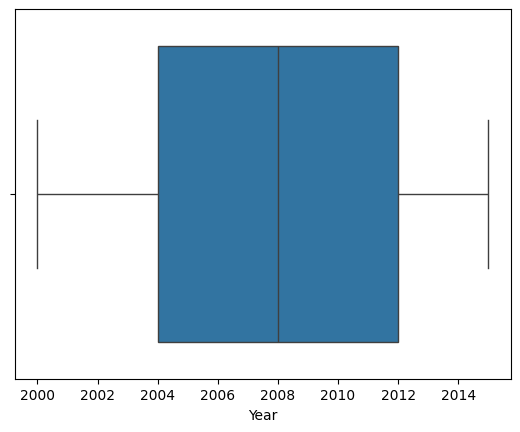

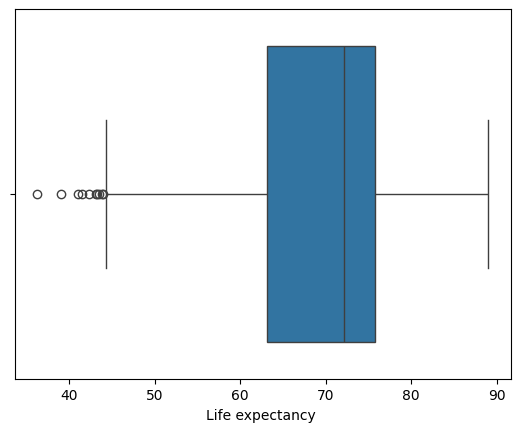

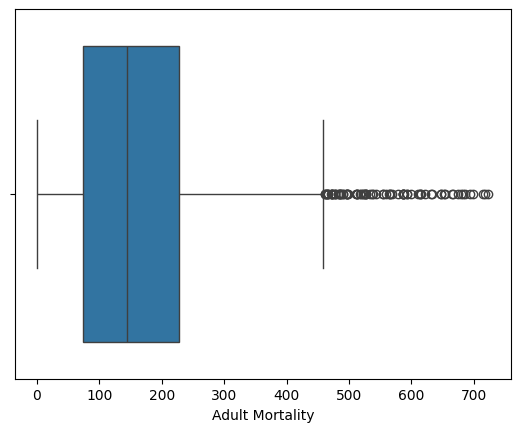

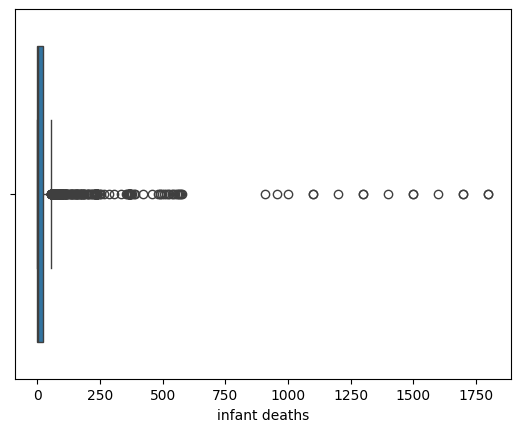

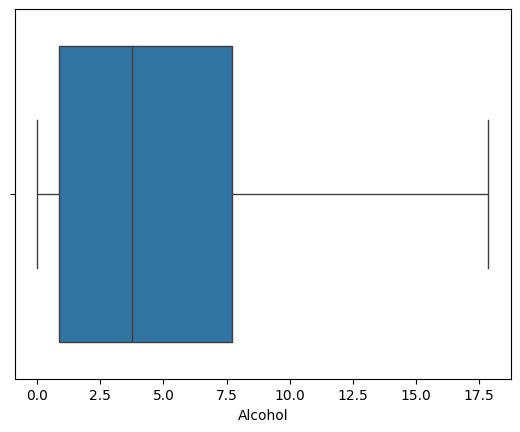

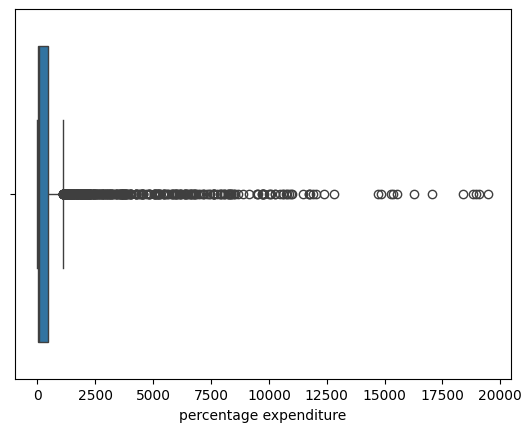

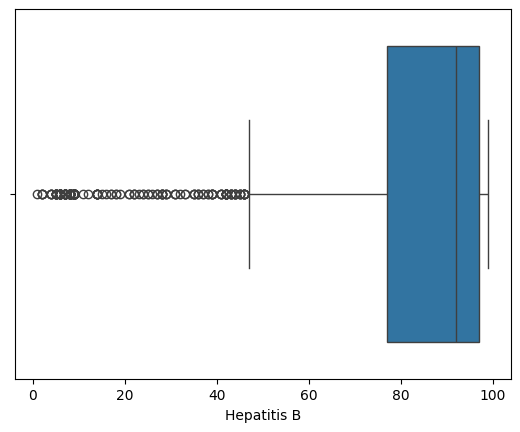

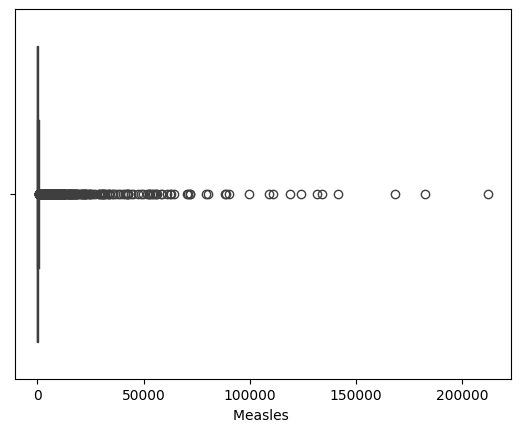

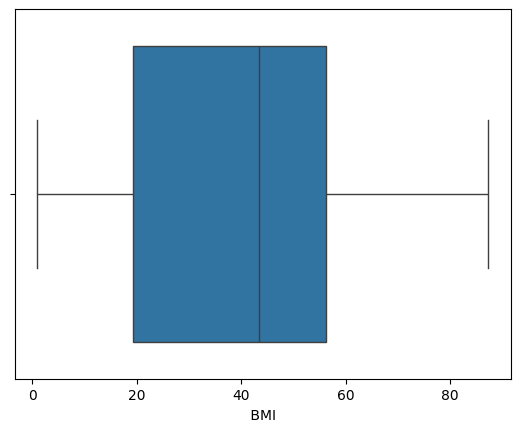

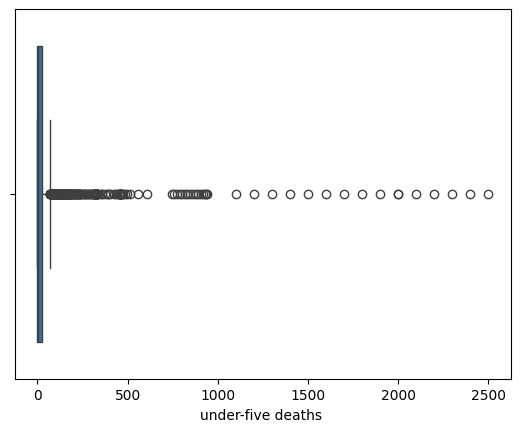

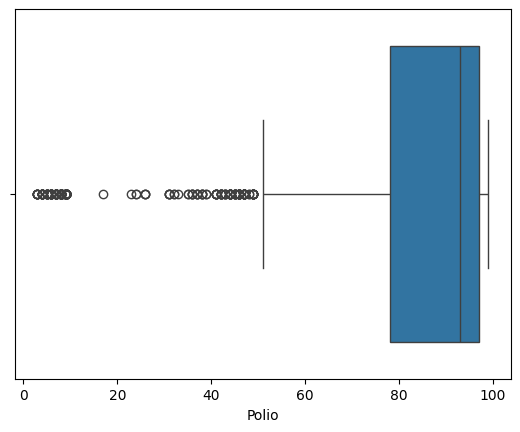

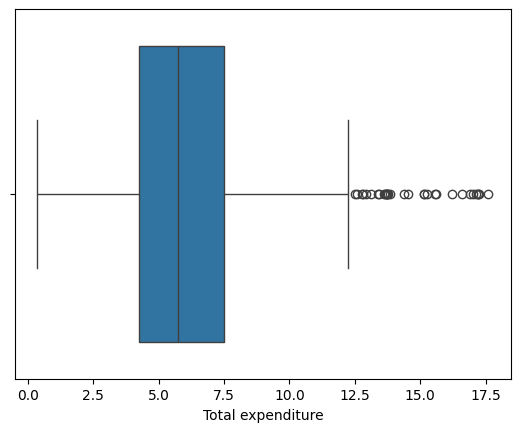

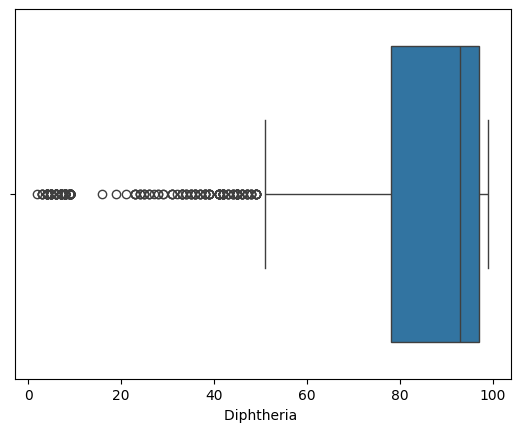

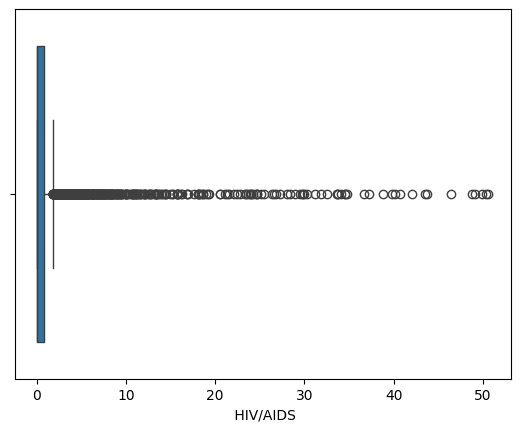

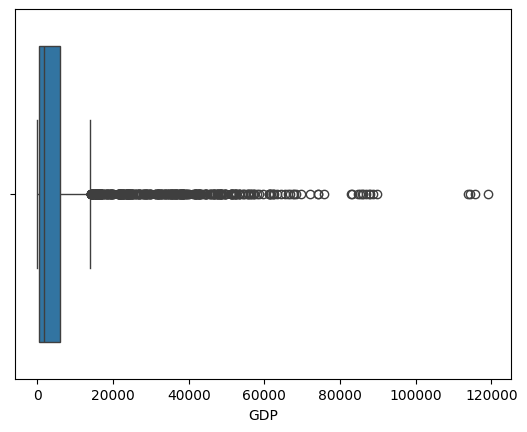

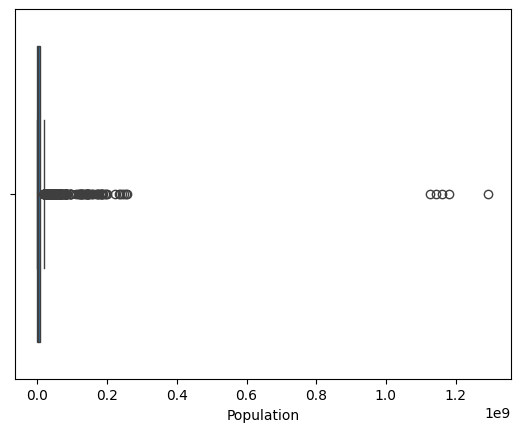

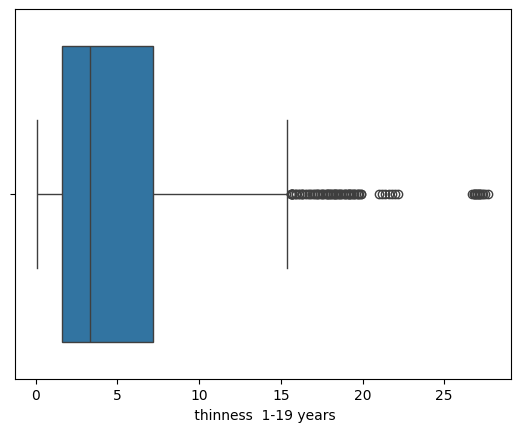

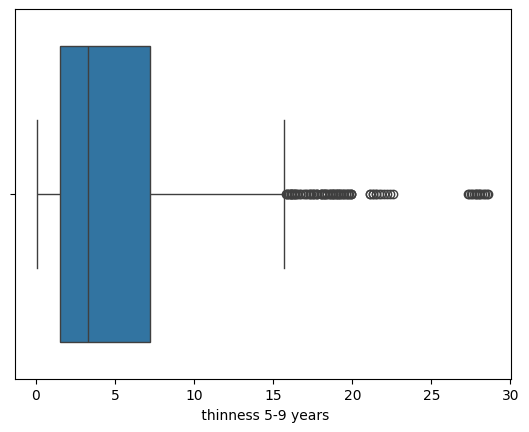

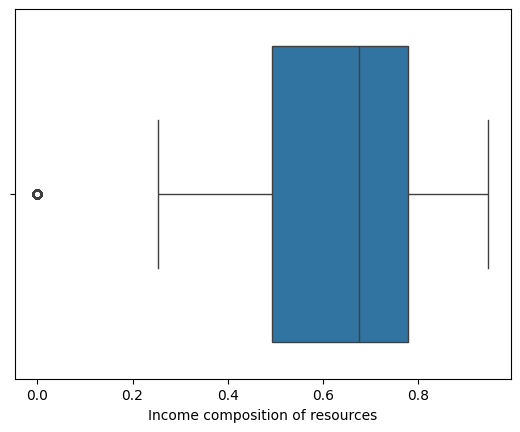

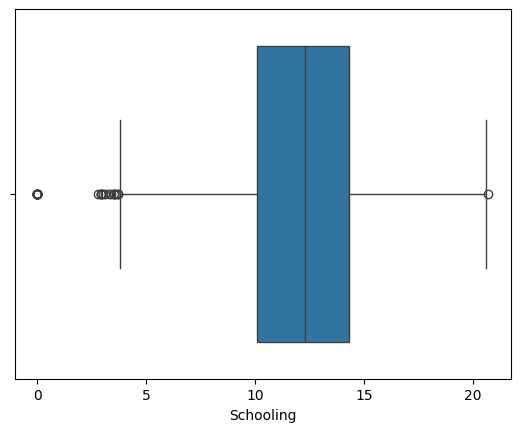

In [29]:
# is there any outlier?
for i in data.select_dtypes(include = 'number').columns:
  sns.boxplot(data = data, x = i)
  plt.show()

# dotted symbols all are outliers

<Axes: >

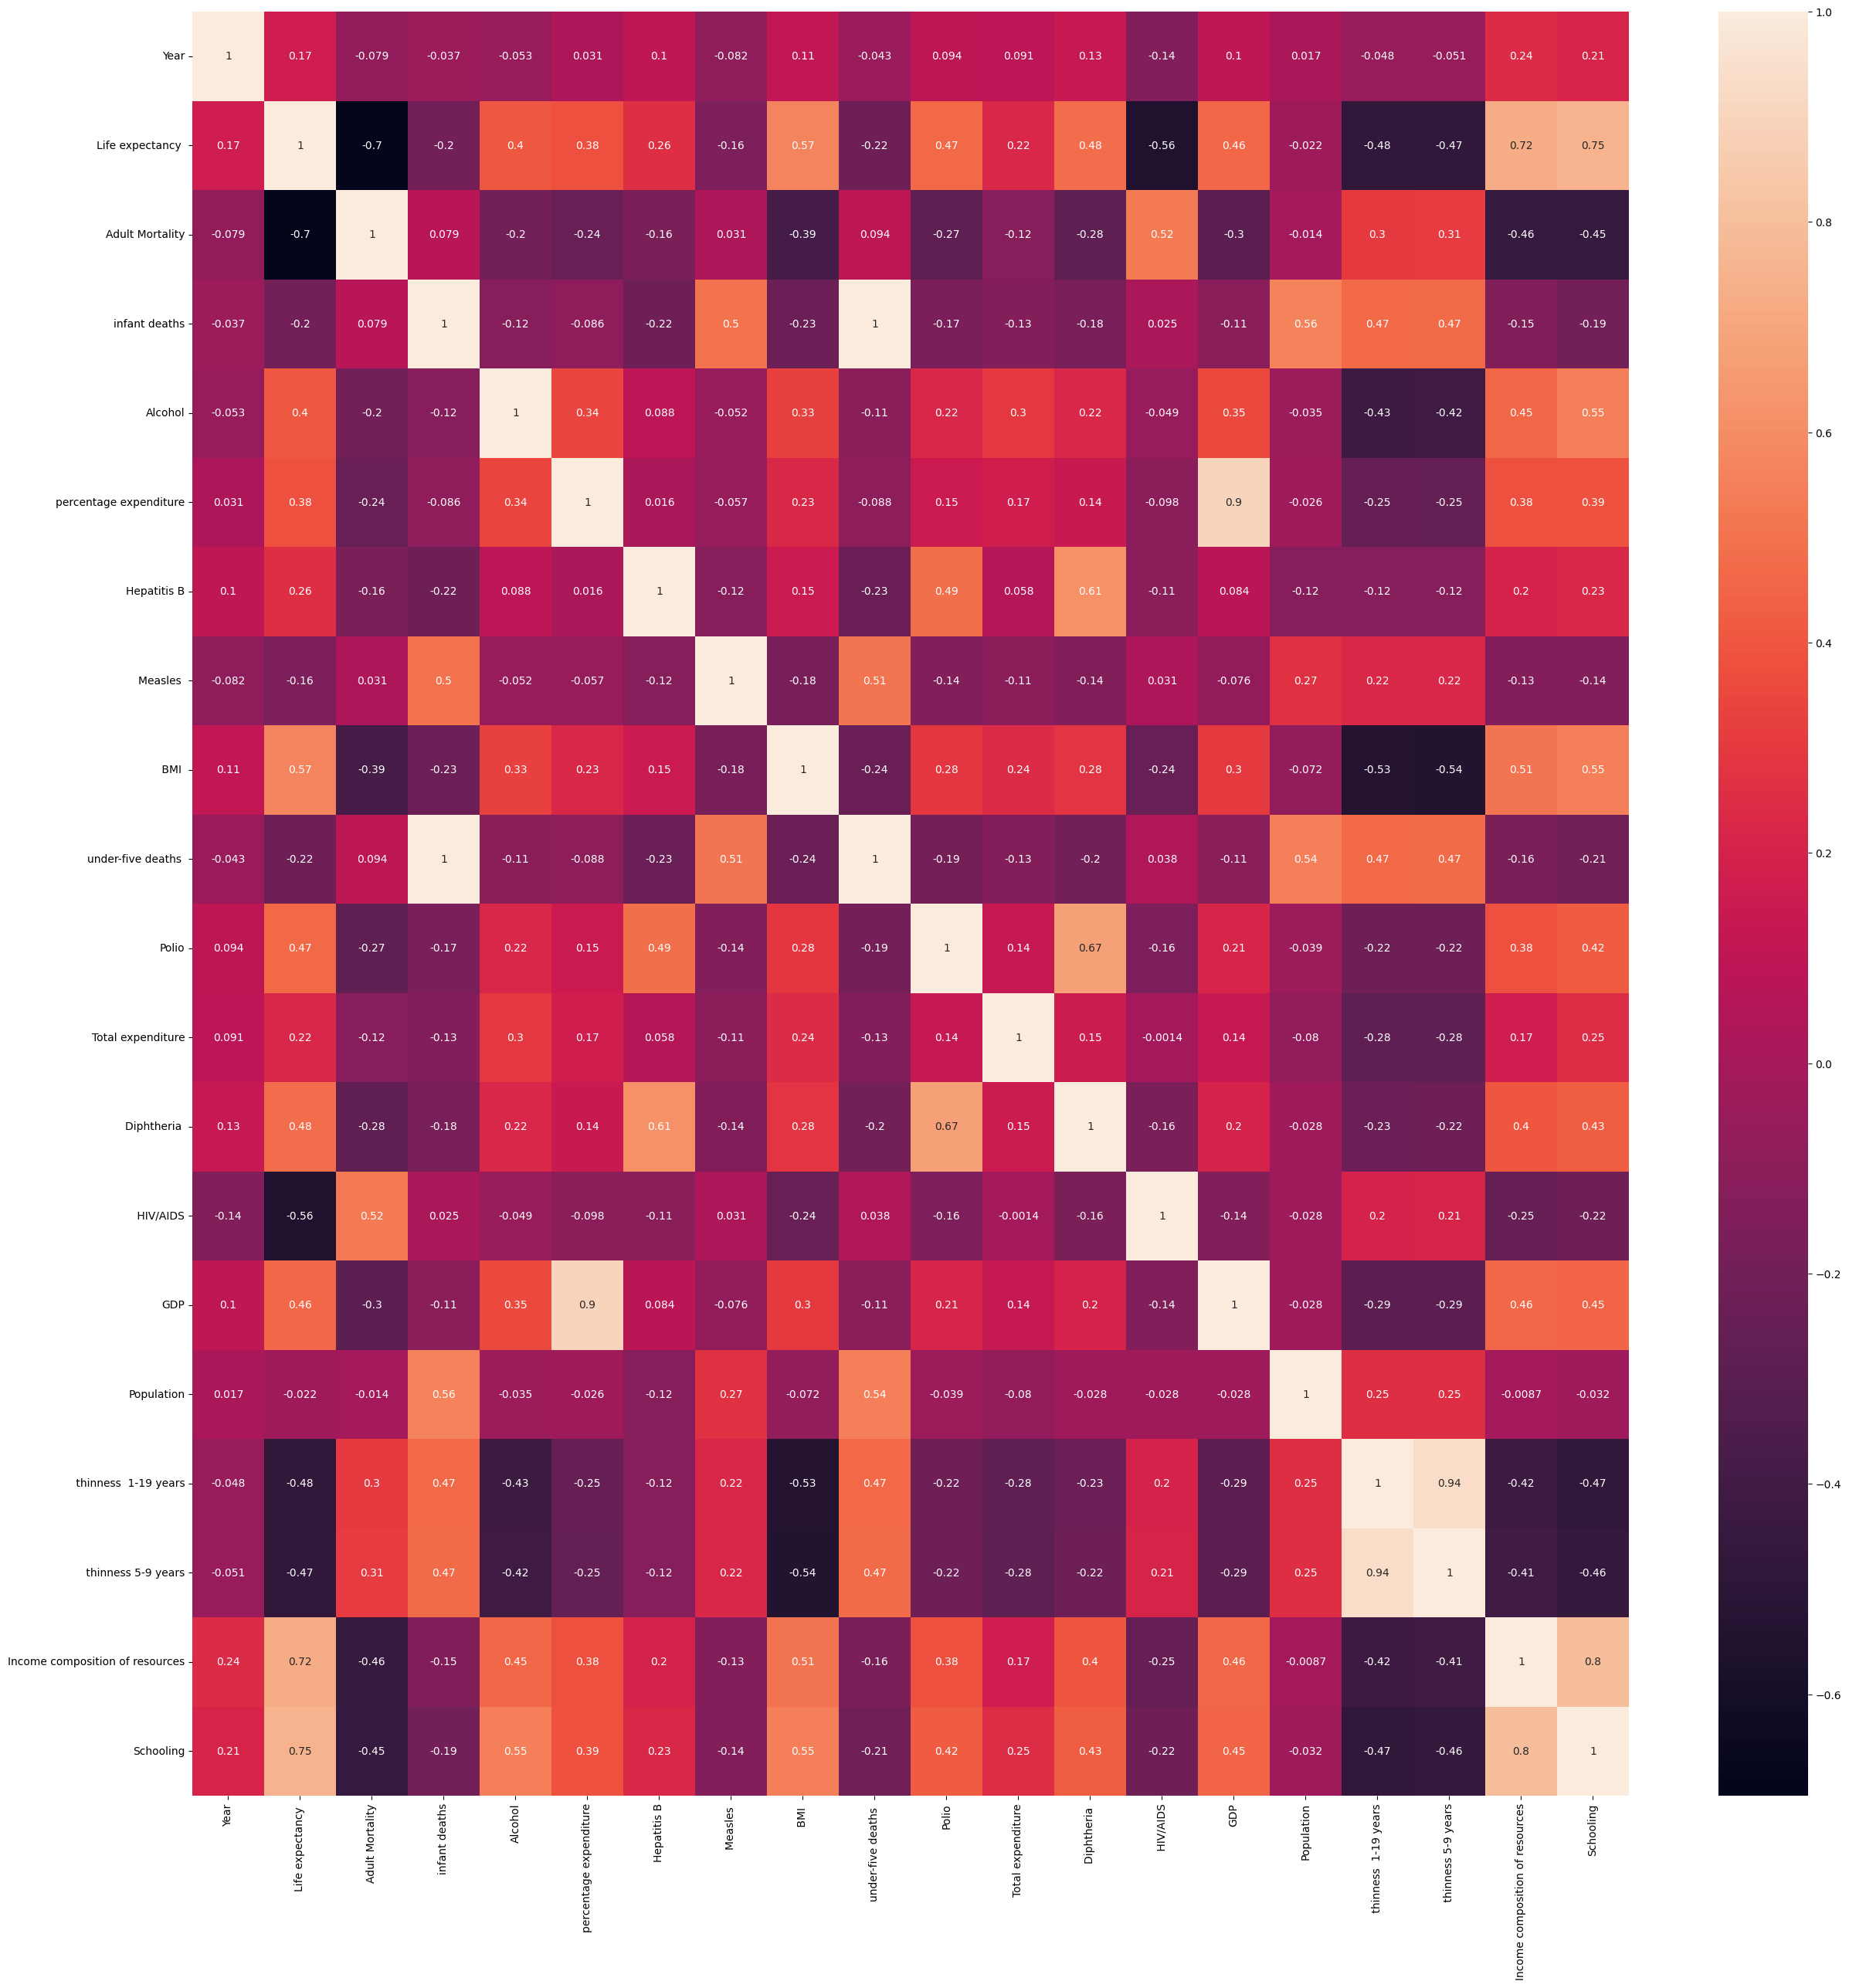

In [53]:
# heat map  = it will show the relation between eacha nd every point
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (30,30))
sns.heatmap(data.select_dtypes(include = 'number').corr(), annot  = True)

we can check highly correlated features with the color gradient


In [57]:
import sklearn
from sklearn.impute import KNNImputer
fill = KNNImputer()

for i in ["Polio"]:
  data[i]= fill.fit_transform(data[[i]])

In [58]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

  KNNIMPUTER a woderful functionality in the sckitlean that will map the nearest clusters and filled in the missing values.

In [59]:
def outlier(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw = q1 -1.5*(iqr)
  up = q3 +1.5*(iqr)
  return lw,up


In [70]:
lw,up = (outlier(data["Polio"]))

<Axes: ylabel='Polio'>

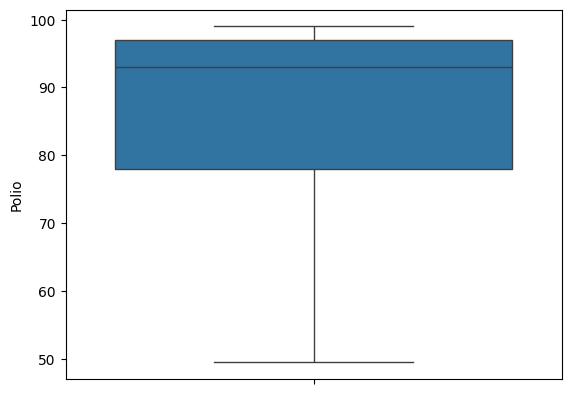

In [77]:
data["Polio"] = np.where(data[i]<lw,lw,data[i])  #will check and update
data["Polio"] = np.where(data[i]>up,up,data[i])   # will check and update

sns.boxplot(data["Polio"])

In [91]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [94]:
dummy = pd.get_dummies(data = data, columns =['Status'])
dummy

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,True
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,True
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,True
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,True


#Observation:s encoded the status column only, later it is used of for ml models